# 统计方法与机器学习-实验报告7
温兆和 10205501432
## 实验背景与目的
本次实验中，采用人造数据的方式构建不同类型的点集。每个点集均是一个二维数据集$\{(x_{i,1},x_{i,2}),i=1,2,\cdots,n\}$。本次实验的目的是让同学们形象地理解不同的聚类方法在不同类型的数据集上的表现是不同的，而且能够掌握如何构造人工数据集，并以此可以用于聚类方法的比较。
## 实验过程
### 1.阅读人工数据集的构造方法，并自行提供一种与所提供的五种不同的人工数据集。
首先，我们引入本次实验所要用到的Python库，并定义好随机种子和样本量。其中，样本量$n=1500$，随机种子取学号$32$。

In [284]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import eig
import random

# Cluster Method
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import silhouette_score
#样本量和随机种子
np.random.seed(32)
n_samples = 1500

def mat_sqrt(Mat):
    eig_value,eig_vec = eig(Mat)
    return(eig_vec.dot(np.diag(np.sqrt(eig_value)).dot(eig_vec.T)))

实验手册中已经提供了五种不同的人工数据集，它们分别是：
- 规模、方差相等且服从正态分布的数据集

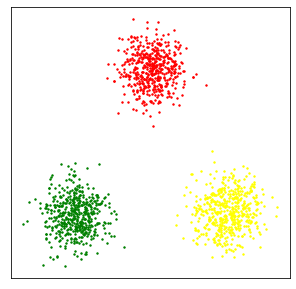

In [285]:
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))

mu1 = np.array([0,1])
mu2 = np.array([-math.sqrt(2),-math.sqrt(2)])
mu3 = np.array([math.sqrt(2),-math.sqrt(2)])

x11 = z1 + mu1
x12 = z2 + mu2
x13 = z3 + mu3
dataset1 = np.r_[x11,x12,x13]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11[:,0],x11[:,1],color="red",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="green",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="yellow",s = 2)

- 相关性强且服从正态分布的数据集

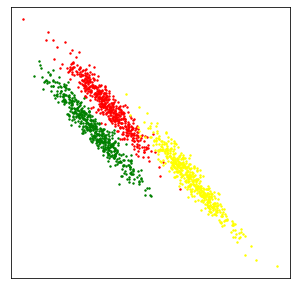

In [286]:
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))

mu1 = np.array([-0.7,1])
rho1 = -0.95
mu2 = np.array([-1,0.5])
mu3 = np.array([1.25,-0.5])
Sigma = np.array([[1,rho1],[rho1,1]])
sigma1 = 0.5

x21 =  z1.dot(mat_sqrt(Sigma)*sigma1) + mu1
x22 = z2.dot(mat_sqrt(Sigma)*sigma1) + mu2
x23 = z3.dot(mat_sqrt(Sigma)*sigma1) + mu3
dataset2 = np.r_[x21,x22,x23]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x21[:,0],x21[:,1],color="red",s = 2)
plt.scatter(x22[:,0],x22[:,1],color="green",s = 2)
plt.scatter(x23[:,0],x23[:,1],color="yellow",s = 2)

- 规模、方差不相等且服从正态分布的数据集

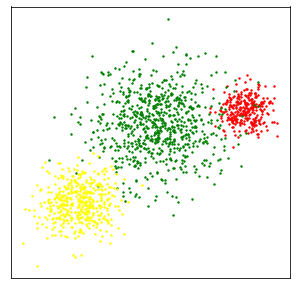

In [287]:
mu1 = np.array([1.5,0.5])
mu2 = np.array([0.2,0.3])
mu3 = np.array([-1,-1])
sigma = 0.1
sigma1 = 2*sigma
sigma2 = 5*sigma
sigma3 = 3*sigma
n_subset1 = int(sigma1/(sigma1+sigma2+sigma3)*n_samples)
n_subset2 = int(sigma2/(sigma1+sigma2+sigma3)*n_samples)
n_subset3 = int(sigma3/(sigma1+sigma2+sigma3)*n_samples)

x31 = np.random.normal(loc = 0, scale = sigma1,size = (n_subset1,2)) + mu1
x32 = np.random.normal(loc = 0, scale = sigma2,size = (n_subset2,2)) + mu2
x33 = np.random.normal(loc = 0, scale = sigma3,size = (n_subset3,2)) + mu3

dataset3 = np.r_[x31,x32,x33]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x31[:,0],x31[:,1],color="red",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="green",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="yellow",s = 2)

- 圆形数据集

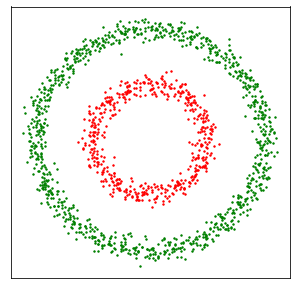

In [288]:
r1 = 1
r2 = 2

K = r1+r2
n_subset1 = int(n_samples/K)
n_subset2 = int(n_samples/K*(K-1))
theta1 = np.linspace(1,360,n_subset1)/360*2*math.pi
theta2 = np.linspace(1,360,n_subset2)/360*2*math.pi
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset1,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset2,2))

x41 = np.transpose(np.array([[r1 * math.cos(theta1[i]) for i in range(len(theta1))],
               [r1 * math.sin(theta1[i]) for i in range(len(theta1))]])) + z1
x42 = np.transpose(np.array([[r2 * math.cos(theta2[i]) for i in range(len(theta2))],
               [r2 * math.sin(theta2[i]) for i in range(len(theta2))]])) + z2
dataset4 = np.r_[x41,x42]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x41[:,0],x41[:,1],color="red",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="green",s = 2)

- 波形数据集

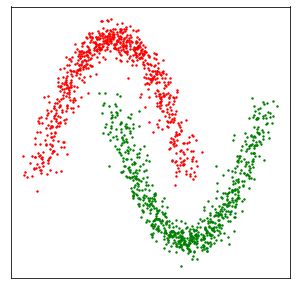

In [289]:
a = 1/(-1.2+0.5)**2
n_subset=int(n_samples/2)

x = np.linspace(-1.5,0.5,n_subset)
y1 = (-a)*(x+0.5)**2 + 1.5
y2 = (a)*(-x -0.5)**2 - 1.5
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))

x51 = np.c_[x,y1] + z1
x52 = np.c_[-x,y2] + z2
dataset5 = np.r_[x51,x52]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x51[:,0],x51[:,1],color="red",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="green",s = 2)

注意到这五种数据集都是基于正态分布构造的。所以，我们可以构造一种基于均匀分布的数据集和另外五种数据集作为对照。

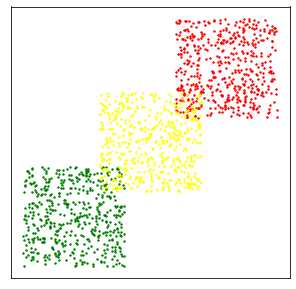

In [290]:
K = 3
n_subset = int(n_samples/K)
x1 = []
x2 = []
x3 = []
for i in range (n_subset):
    x1.append([random.uniform(-5,5),random.uniform(-5,5)])
    x2.append([random.uniform(-5,5),random.uniform(-5,5)])
    x3.append([random.uniform(-5,5),random.uniform(-5,5)])
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)
mu1 = np.array([7.5,7.5])
mu2=np.array([-7.5,-7.5])
x61=x1+mu1
x62=x2+mu2
x63=x3
dataset6=np.r_[x61,x62,x63]
fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x61[:,0],x61[:,1],color="red",s = 2)
plt.scatter(x62[:,0],x62[:,1],color="green",s = 2)
plt.scatter(x63[:,0],x63[:,1],color="yellow",s = 2)

### 2. 采用不同的聚类方式（包括：层次聚类、Kmeans、GMM、DBSCAN），分别在六个数据集上进行聚类。
在进行聚类时，我们将保持聚类的类数与原本的子集数保持一致。返回值是聚类后每一类里各有多少个样本。
- 层次聚类

层次聚类有自上而下和自下而上两种方法。具体来说，自下而上指的是先将每一点看作是一个类，再逐步把距离最近的两个类合并成一个类，直到所有的点都在同一个类里；而自上而下指的是把所有的样本点先放在一类里，找到距离最远的两个点分别放入两类，再比较其它点和这两个点之间的距离，从而把所有点分成两类，并重复这个步骤直到所有的点都各自被分到不同的类里。我们先调用Python内置的函数，用层次聚类法对六个数据集进行聚类。这个内置函数本质上是递归合并样本数据对的集群，采用的是自下而上的方法。

In [291]:
def clustercounter(label):
    ans = [0,0,0]
    for i in range(len(label)):
        ans[label[i]]=ans[label[i]]+1
    return ans
#dataset1
Cl1=AgglomerativeClustering(n_clusters = 3).fit(dataset1)
Cl1_Ans = clustercounter(Cl1.labels_)
print(Cl1_Ans)

[500, 500, 500]


In [292]:
#dataset2
Cl2=AgglomerativeClustering(n_clusters = 3).fit(dataset2)
Cl2_Ans = clustercounter(Cl2.labels_)
print(Cl2_Ans)

[486, 596, 418]


In [293]:
#dataset3
Cl3=AgglomerativeClustering(n_clusters = 3).fit(dataset3)
Cl3_Ans = clustercounter(Cl3.labels_)
print(Cl3_Ans)

[706, 455, 339]


In [294]:
#dataset4
Cl4=AgglomerativeClustering(n_clusters = 2).fit(dataset4)
Cl4_Ans = clustercounter(Cl4.labels_)
print(Cl4_Ans)

[1005, 495, 0]


In [295]:
#dataset5
Cl5=AgglomerativeClustering(n_clusters = 2).fit(dataset5)
Cl5_Ans = clustercounter(Cl5.labels_)
print(Cl5_Ans)

[963, 537, 0]


In [296]:
#dataset6
Cl6=AgglomerativeClustering(n_clusters = 3).fit(dataset6)
Cl6_Ans = clustercounter(Cl6.labels_)
print(Cl6_Ans)

[559, 521, 420]


- Kmeans

Kmeans聚类是指先确定类的个数，再按照这个个数确定若干个中心点，并根据点与这些中心点的远近对其它点进行分类。分类完成后，重新确定各类的中心点位置，并根据新确定的中心点再次对所有点分类。重复以上步骤，直到所有类的中心点都不再改变为止。

In [297]:
#dataset1
Km1=KMeans(n_clusters = 3).fit(dataset1)
Km1_Ans = clustercounter(Km1.labels_)
print(Km1_Ans)

[500, 500, 500]


In [298]:
#dataset2
Km2=KMeans(n_clusters = 3).fit(dataset2)
Km2_Ans = clustercounter(Km2.labels_)
print(Km2_Ans)

[544, 454, 502]


In [299]:
#dataset3
Km3=KMeans(n_clusters = 3).fit(dataset3)
Km3_Ans = clustercounter(Km3.labels_)
print(Km3_Ans)

[485, 386, 629]


In [300]:
#dataset4
Km4=KMeans(n_clusters = 2).fit(dataset4)
Km4_Ans = clustercounter(Km4.labels_)
print(Km4_Ans)

[760, 740, 0]


In [301]:
#dataset5
Km5=KMeans(n_clusters = 2).fit(dataset5)
Km5_Ans = clustercounter(Km5.labels_)
print(Km5_Ans)

[748, 752, 0]


In [302]:
#dataset6
Km6=KMeans(n_clusters = 3).fit(dataset6)
Km6_Ans = clustercounter(Km6.labels_)
print(Km6_Ans)

[506, 505, 489]


- GMM

GMM方法假设所有的样本点均来自于$K$个不同的正态分布，并通过估计某个样本点来自于其中某一个正态分布的概率来对样本点进行分类。

In [303]:
#dataset1
Gm1=mixture.GaussianMixture(n_components = 3)
Gm1.fit(dataset1)
Gm1_labels_ = Gm1.predict(dataset1)
Gm1_Ans = clustercounter(Gm1_labels_)
print(Gm1_Ans)

[500, 500, 500]


In [304]:
#dataset2
Gm2=mixture.GaussianMixture(n_components = 3)
Gm2.fit(dataset2)
Gm2_labels_ = Gm2.predict(dataset2)
Gm2_Ans = clustercounter(Gm2_labels_)
print(Gm2_Ans)

[498, 556, 446]


In [305]:
#dataset3
Gm3=mixture.GaussianMixture(n_components = 3)
Gm3.fit(dataset3)
Gm3_labels_ = Gm3.predict(dataset3)
Gm3_Ans = clustercounter(Gm3_labels_)
print(Gm3_Ans)

[312, 456, 732]


In [306]:
#dataset4
Gm4=mixture.GaussianMixture(n_components = 2)
Gm4.fit(dataset4)
Gm4_labels_ = Gm4.predict(dataset4)
Gm4_Ans = clustercounter(Gm4_labels_)
print(Gm4_Ans)

[748, 752, 0]


In [307]:
#dataset5
Gm5=mixture.GaussianMixture(n_components = 2)
Gm5.fit(dataset5)
Gm5_labels_ = Gm5.predict(dataset5)
Gm5_Ans = clustercounter(Gm5_labels_)
print(Gm5_Ans)

[759, 741, 0]


In [308]:
#dataset6
Gm6=mixture.GaussianMixture(n_components = 3)
Gm6.fit(dataset6)
Gm6_labels_ = Gm6.predict(dataset6)
Gm6_Ans = clustercounter(Gm6_labels_)
print(Gm6_Ans)

[505, 490, 505]


- DBSCAN

DBSCAN方法的主要思想就是，如果这两个样本点属于同一类别，那这两个样本点附近有属于这一类别的点。

In [309]:
#dataset1
Db1=DBSCAN(min_samples=50).fit(dataset1)
Db1_Ans = clustercounter(Db1.labels_)
print(Db1_Ans)

[500, 500, 500]


In [310]:
#dataset2
Db2=DBSCAN(min_samples=250).fit(dataset2)
Db2_Ans = clustercounter(Db2.labels_)
print(Db2_Ans)

[896, 255, 349]


In [311]:
#dataset3
Db3=DBSCAN(min_samples=250).fit(dataset3)
Db3_Ans = clustercounter(Db3.labels_)
print(Db3_Ans)

[385, 527, 588]


In [312]:
#dataset4
Db4=DBSCAN(min_samples=75).fit(dataset4)
Db4_Ans = clustercounter(Db4.labels_)
print(Db4_Ans)

[500, 1000, 0]


In [313]:
#dataset5
Db5=DBSCAN(min_samples=200).fit(dataset5)
Db5_Ans = clustercounter(Db5.labels_)
print(Db5_Ans)

[500, 488, 512]


In [314]:
#dataset6
Db6=DBSCAN(eps = 3,min_samples=100).fit(dataset6)
Db6_Ans = clustercounter(Db6.labels_)
print(Db6_Ans)

[1500, 0, 0]


### 3. 请用绘图的方式展示不同聚类方式的结果。
首先我们来定义一个根据聚类结果绘图的函数,并把各个数据集的真实情况画在同一张画布上便于在不同聚类方法之间进行比较：

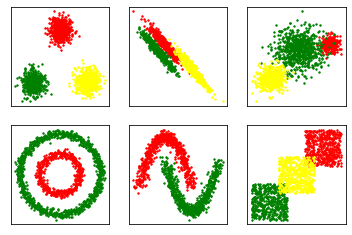

In [315]:
#绘图函数
def paintclusterresult(dataset,label):
    nx1 = []
    nx2=[]
    nx3 = []
    for i in range(len(dataset)):
        if label[i]==0:
            nx1.append(dataset[i])
        elif label[i]==1:
            nx2.append(dataset[i])
        elif label[i]==2:
            nx3.append(dataset[i])
    nx1=np.array(nx1)
    nx2=np.array(nx2)
    nx3=np.array(nx3)
    plt.xticks(())
    plt.yticks(())
    if len(nx1)!=0:
        plt.scatter(nx1[:,0],nx1[:,1],color="red",s = 2)
    if len(nx2)!=0:
        plt.scatter(nx2[:,0],nx2[:,1],color="green",s = 2)
    if len(nx3)!=0:
        plt.scatter(nx3[:,0],nx3[:,1],color="yellow",s = 2)
#数据集的真实分类情况
plt.subplot(231)
plt.xticks(())
plt.yticks(())
plt.scatter(x11[:,0],x11[:,1],color="red",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="green",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="yellow",s = 2)
plt.subplot(232)
plt.xticks(())
plt.yticks(())
plt.scatter(x21[:,0],x21[:,1],color="red",s = 2)
plt.scatter(x22[:,0],x22[:,1],color="green",s = 2)
plt.scatter(x23[:,0],x23[:,1],color="yellow",s = 2)
plt.subplot(233)
plt.xticks(())
plt.yticks(())
plt.scatter(x31[:,0],x31[:,1],color="red",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="green",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="yellow",s = 2)
plt.subplot(234)
plt.xticks(())
plt.yticks(())
plt.scatter(x41[:,0],x41[:,1],color="red",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="green",s = 2)
plt.subplot(235)
plt.xticks(())
plt.yticks(())
plt.scatter(x51[:,0],x51[:,1],color="red",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="green",s = 2)
plt.subplot(236)
plt.xticks(())
plt.yticks(())
plt.scatter(x61[:,0],x61[:,1],color="red",s = 2)
plt.scatter(x62[:,0],x62[:,1],color="green",s = 2)
plt.scatter(x63[:,0],x63[:,1],color="yellow",s = 2)

- 层次聚类

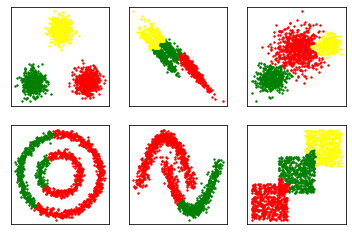

In [316]:
plt.subplot(231)
paintclusterresult(dataset1,Cl1.labels_)
plt.subplot(232)
paintclusterresult(dataset2,Cl2.labels_)
plt.subplot(233)
paintclusterresult(dataset3,Cl3.labels_)
plt.subplot(234)
paintclusterresult(dataset4,Cl4.labels_)
plt.subplot(235)
paintclusterresult(dataset5,Cl5.labels_)
plt.subplot(236)
paintclusterresult(dataset6,Cl6.labels_)

- Kmeans

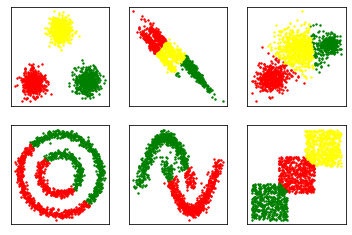

In [317]:
plt.subplot(231)
paintclusterresult(dataset1,Km1.labels_)
plt.subplot(232)
paintclusterresult(dataset2,Km2.labels_)
plt.subplot(233)
paintclusterresult(dataset3,Km3.labels_)
plt.subplot(234)
paintclusterresult(dataset4,Km4.labels_)
plt.subplot(235)
paintclusterresult(dataset5,Km5.labels_)
plt.subplot(236)
paintclusterresult(dataset6,Km6.labels_)

- GMM

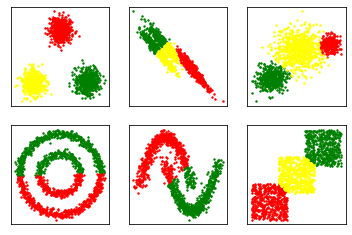

In [318]:
plt.subplot(231)
paintclusterresult(dataset1,Gm1_labels_)
plt.subplot(232)
paintclusterresult(dataset2,Gm2_labels_)
plt.subplot(233)
paintclusterresult(dataset3,Gm3_labels_)
plt.subplot(234)
paintclusterresult(dataset4,Gm4_labels_)
plt.subplot(235)
paintclusterresult(dataset5,Gm5_labels_)
plt.subplot(236)
paintclusterresult(dataset6,Gm6_labels_)

- DBSCAN

由于这种方法把第六个数据集全部归为一类，所以我们无法调用绘图函数，只能直接把第六个数据集中的所有点标为同一种颜色。

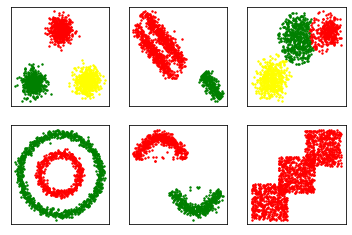

In [319]:
plt.subplot(231)
paintclusterresult(dataset1,Db1.labels_)
plt.subplot(232)
paintclusterresult(dataset2,Db2.labels_)
plt.subplot(233)
paintclusterresult(dataset3,Db3.labels_)
plt.subplot(234)
paintclusterresult(dataset4,Db4.labels_)
plt.subplot(235)
paintclusterresult(dataset5,Db5.labels_)
plt.subplot(236)
paintclusterresult(dataset6,Db6.labels_)

### 4. 在不同数据集上，分别使用外部聚类有效性和内部聚类有效性的度量方法来比较不同聚类方法,结果请填入下表。
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
</table>
我们使用$ARI$指数来判断聚类的外部有效性，用轮廓系数来判断内部聚类有效性。这两个值的取值范围均为$[-1,1]$，越接近于$1$，聚类效果越好。

- dataset 1

In [320]:
y_pred_1 = []
for i in range(len(x11)):
    y_pred_1.append(0)
for i in range(len(x12)):
    y_pred_1.append(1)
for i in range(len(x13)):
    y_pred_1.append(2)
Ans1 = []
Ans1.append([metrics.adjusted_rand_score(Cl1.labels_,y_pred_1),silhouette_score(dataset1,Cl1.labels_)])
Ans1.append([metrics.adjusted_rand_score(Km1.labels_,y_pred_1),silhouette_score(dataset1,Km1.labels_)])
Ans1.append([metrics.adjusted_rand_score(Gm1_labels_,y_pred_1),silhouette_score(dataset1,Gm1_labels_)])
Ans1.append([metrics.adjusted_rand_score(Db1.labels_,y_pred_1),silhouette_score(dataset1,Db1.labels_)])
Ans1 = np.array(Ans1)
print(Ans1)

[[1.         0.79764108]
 [1.         0.79764108]
 [1.         0.79764108]
 [1.         0.79764108]]


- dataset 2

In [321]:
y_pred_2 = []
for i in range(len(x21)):
    y_pred_2.append(0)
for i in range(len(x22)):
    y_pred_2.append(1)
for i in range(len(x23)):
    y_pred_2.append(2)
Ans2 = []
Ans2.append([metrics.adjusted_rand_score(Cl2.labels_,y_pred_2),silhouette_score(dataset2,Cl2.labels_)])
Ans2.append([metrics.adjusted_rand_score(Km2.labels_,y_pred_2),silhouette_score(dataset2,Km2.labels_)])
Ans2.append([metrics.adjusted_rand_score(Gm2_labels_,y_pred_2),silhouette_score(dataset2,Gm2_labels_)])
Ans2.append([metrics.adjusted_rand_score(Db2.labels_,y_pred_2),silhouette_score(dataset2,Db2.labels_)])
Ans2 = np.array(Ans2)
print(Ans2)

[[0.45618324 0.46999632]
 [0.39251699 0.47868151]
 [0.48560285 0.46231972]
 [0.35889145 0.39919332]]


- dataset 3

In [322]:
y_pred_3 = []
for i in range(len(x31)):
    y_pred_3.append(0)
for i in range(len(x32)):
    y_pred_3.append(1)
for i in range(len(x33)):
    y_pred_3.append(2)
Ans3 = []
Ans3.append([metrics.adjusted_rand_score(Cl3.labels_,y_pred_3),silhouette_score(dataset3,Cl3.labels_)])
Ans3.append([metrics.adjusted_rand_score(Km3.labels_,y_pred_3),silhouette_score(dataset3,Km3.labels_)])
Ans3.append([metrics.adjusted_rand_score(Gm3_labels_,y_pred_3),silhouette_score(dataset3,Gm3_labels_)])
Ans3.append([metrics.adjusted_rand_score(Db3.labels_,y_pred_3),silhouette_score(dataset3,Db3.labels_)])
Ans3 = np.array(Ans3)
print(Ans3)

[[0.87573535 0.52198407]
 [0.76815618 0.5386198 ]
 [0.91372545 0.51863084]
 [0.66584507 0.49489242]]


- dataset 4

In [323]:
y_pred_4 = []
for i in range(len(x41)):
    y_pred_4.append(0)
for i in range(len(x42)):
    y_pred_4.append(1)
Ans4 = []
Ans4.append([metrics.adjusted_rand_score(Cl4.labels_,y_pred_4),silhouette_score(dataset4,Cl4.labels_)])
Ans4.append([metrics.adjusted_rand_score(Km4.labels_,y_pred_4),silhouette_score(dataset4,Km4.labels_)])
Ans4.append([metrics.adjusted_rand_score(Gm4_labels_,y_pred_4),silhouette_score(dataset4,Gm4_labels_)])
Ans4.append([metrics.adjusted_rand_score(Db4.labels_,y_pred_4),silhouette_score(dataset4,Db4.labels_)])
Ans4 = np.array(Ans4)
print(Ans4)

[[-1.34617403e-02  3.17654962e-01]
 [-5.84549255e-04  3.61295179e-01]
 [-5.94126601e-04  3.61365848e-01]
 [ 1.00000000e+00  2.06027709e-02]]


- dataset 5

In [324]:
y_pred_5 = []
for i in range(len(x51)):
    y_pred_5.append(0)
for i in range(len(x52)):
    y_pred_5.append(1)
Ans5 = []
Ans5.append([metrics.adjusted_rand_score(Cl5.labels_,y_pred_5),silhouette_score(dataset5,Cl5.labels_)])
Ans5.append([metrics.adjusted_rand_score(Km5.labels_,y_pred_5),silhouette_score(dataset5,Km5.labels_)])
Ans5.append([metrics.adjusted_rand_score(Gm5_labels_,y_pred_5),silhouette_score(dataset5,Gm5_labels_)])
Ans5.append([metrics.adjusted_rand_score(Db5.labels_,y_pred_5),silhouette_score(dataset5,Db5.labels_)])
Ans5 = np.array(Ans5)
print(Ans5)

[[0.51235693 0.46492014]
 [0.63975968 0.55333654]
 [0.60813862 0.55153843]
 [0.41434851 0.41766237]]


- dataset 6

由于DBSCAN方法直接把数据集六的所有样本点归为一类，算不出轮廓值，我们直接把相应的轮廓值记为$-1$。

In [325]:
y_pred_6 = []
for i in range(len(x61)):
    y_pred_6.append(0)
for i in range(len(x62)):
    y_pred_6.append(1)
for i in range(len(x63)):
    y_pred_6.append(2)
Ans6 = []
Ans6.append([metrics.adjusted_rand_score(Cl6.labels_,y_pred_6),silhouette_score(dataset6,Cl6.labels_)])
Ans6.append([metrics.adjusted_rand_score(Km6.labels_,y_pred_6),silhouette_score(dataset6,Km6.labels_)])
Ans6.append([metrics.adjusted_rand_score(Gm6_labels_,y_pred_6),silhouette_score(dataset6,Gm6_labels_)])
Ans6.append([metrics.adjusted_rand_score(Db6.labels_,y_pred_6),-1])
Ans6 = np.array(Ans6)
print(Ans6)

[[ 0.75172725  0.46635183]
 [ 0.85121654  0.47928992]
 [ 0.84944467  0.47921124]
 [ 0.         -1.        ]]


### 5. 通过本次实验，分析一下各类聚类方法的使用范围。
对于像数据集一这样属于同一类的点距离非常近，而不同的类之间距离又非常远的数据集来说，任何一种聚类方法的聚类效果都很好。但是，另外五个数据集都存在着属于不同类的点距离却非常近，甚至不同类的样本点在同一个区域互相交错的现象。我们就基于这五个数据集的聚类结果来分析不同聚类方法适用的数据集。
- 层次聚类

前面已经说过，层次聚类的思想就是把所有的样本点归为一类，再不断把距离最近的两类合并为一类。但是这种方法会受到距离很近但不属于同一类的两个点的影响。比如在数据集六的聚类结果中，黄色正方形左下角有很大一块地方都变成了绿色，甚至一些原本只属于黄色子类的样本点也被划分到绿色子类里去了。究其原因，很可能就是因为在黄绿交错区域及其附近，有很多黄色样本点和绿色样本点距离很近的情况，所以在聚类一开始的时候就被划到错误的类别里去了。用其它方法对数据集六进行聚类都没有发生这样的情况。包括像数据集四和数据集五，两个点可能属于不同的圆或者波浪但距离较近，也会被划分到相同的类里。所以，层次聚类法适用于类间距离较大的数据集。
- Kmeans聚类

前面已经说过，Kmeans聚类是根据输入的聚类数先随即确定相应数目的中心点，根据其它点与这些中心点之间的距离对所有样本点进行粗分类，再根据分类结果重新确定中心点的位置并重新分类，直到分类结果不再改变为止。所以，Kmeans方法的聚类效果可能比较依赖初始中心点选取的位置。对于像数据集四、数据集五这样的数据集，如果一开始两个中心点都取在同一个圆或者同一个波浪上，就可能造成聚类结果不准。此外，数据集二、数据集四和数据集五都出现了某个点和与自己同一类的点距离较远，但和属于不同类的点距离较近的现象。在Kmeans算法运行过程中，属于同一类距离较远的点会被分到不同的子类，而原本属于不同类但距离较近的点会被划分到同一类。所以，Kmeans方法适用于组内距离较小的数据集。

- GMM

前面已经说过，GMM方法的思想是通过判断样本点来自哪一个正态总体来判断样本点属于哪一类的聚类方法。但在实践中，我们发现都来自正态样本的数据集二用GMM方法效果不好，但不是通过正态样本构造的数据集六用GMM方法聚类的效果反而比较好。本人推测，GMM方法可能是根据样本点的坐标来推测它来自的正态总体的均值。所以，GMM方法不仅需要组间距离大，还要求属于不同子类的样本点横纵坐标的差距也要大。
- DBSCAN

和前面几种方法不同的是，DBSCAN方法要求某个点必须属于某个中心点的邻域才能和这个中心点被归为一类。对于像数据集六这样每个点之间的距离都差不多的数据集，就会被直接归为一类。所以，某种程度上，DBSCAN方法也要求组间距离大。此外，如果一个点不在任何一个中心点的邻域内就会被当成噪声，无法归入任何一类。比如，在数据集五中就出现了这样去情况。所以这种方法可能不太适合用于过于稀疏的数据集。此外，使用者必须事先根据数据集内点与点的距离和样本量大致确定输入的邻域半径和最少样本个数，否则不好的输入会直接影响聚类结果。个人认为，DBSCAN是对使用者要求比较高的一种聚类方法。

## 参考文献
[1] https://scikit-learn.org/stable/modules/clustering.html#clustering